In [201]:
import pandas as pd
df=pd.read_excel("ip2countries.xlsx",index_col=0)
df

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
country,,,,,,,,,,
Algeria,10555.77295,103.84254,35.57219,1.09477,28.55218,18.90770,0.16408,74.34625,14.75335,66.94180
Argentina,21474.46315,120.81504,17.99867,2.00182,14.96615,41.03279,14.70895,75.16305,10.34445,90.68355
Australia,44901.79421,98.17638,20.51751,3.45412,21.40077,73.27461,106.56762,81.42902,5.49395,85.10010
Austria,51798.84394,100.13374,50.61335,2.47289,47.36891,68.53655,28.66159,80.31683,5.06380,58.32815
Bahrain,46856.86522,98.47988,81.96372,4.32123,65.43680,57.79351,77.77578,75.94505,1.05190,88.70820
Bangladesh,2991.50823,104.76766,15.84205,0.90378,21.88604,5.70977,21.00636,69.40680,4.09800,30.22440
Barbados,15592.12452,97.76974,43.37301,8.13230,46.79701,58.80189,58.55669,78.27870,10.05935,32.16005
Belgium,47629.32587,99.32256,76.70332,11.99939,74.46425,68.48175,67.15990,79.93902,7.43000,97.61175
Botswana,14548.50317,96.63532,48.50275,2.73895,45.44328,17.01316,16.88933,59.41175,18.29905,61.47060


In [202]:
import plotly.io as pio
pio.renderers.default='svg'

<AxesSubplot:>

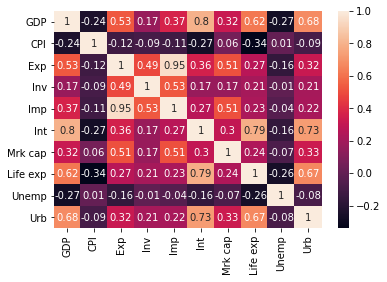

In [203]:
#матирца парных корреляций (R)
import seaborn as sns
sns.heatmap(df.corr().round(2),annot=True)

In [204]:
import numpy as np
from scipy import stats, linalg

def partial_corr(C):
    
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

In [205]:
df_partial=pd.DataFrame(partial_corr(df), columns=df.columns, index=df.columns)

<AxesSubplot:>

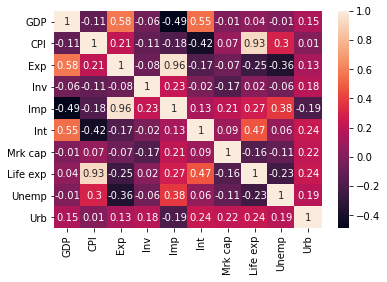

In [206]:
sns.heatmap(df_partial.round(2),annot=True)

In [207]:
df_corr=df.corr()

In [208]:
#df_corr.to_excel("корреляции_парные.xlsx", sheet_name="Sheet1")
#df_partial.to_excel("корреляции_частные.xlsx", sheet_name="Sheet2")
#from google.colab import files
#files.download("корреляции_парные.xlsx")
#files.download("корреляции_частные.xlsx")

In [209]:
alg_dop=np.zeros((df_corr.shape))

In [210]:
def minor(i,j):
  return np.delete(np.delete(df_corr.values,i,axis=0),j,axis=1)
for i in range(0,10):
  for j in range(0,10):
    alg_dop[i][j]=((-1)**(i+1+j+1))*np.linalg.det(minor(i,j))

In [211]:
pd.DataFrame(alg_dop)

,0,1,2,3,4,5,6,7,8,9
0,0.00286,0.00014,-0.00364,0.00008,0.00287,-0.00152,0.00001,0.00002,0.00003,-0.00033
1,0.00014,0.00066,0.00002,0.00000,0.00004,-0.00001,-0.00012,0.00032,0.00009,-0.00022
2,-0.00364,0.00002,0.01416,0.00025,-0.01273,0.00084,0.00019,0.00136,0.00124,-0.00073
3,0.00008,0.00000,0.00025,0.00079,-0.00072,0.00004,0.00014,-0.00006,0.00003,-0.00017
4,0.00287,0.00004,-0.01273,-0.00072,0.01254,-0.00064,-0.00063,-0.00124,-0.00119,0.00087
5,-0.00152,-0.00001,0.00084,0.00004,-0.00064,0.00272,-0.00007,-0.00112,-0.00019,-0.00033
6,0.00001,-0.00012,0.00019,0.00014,-0.00063,-0.00007,0.00081,0.00002,0.00005,-0.00019
7,0.00002,0.00032,0.00136,-0.00006,-0.00124,-0.00112,0.00002,0.00192,0.00045,-0.00056
8,0.00003,0.00009,0.00124,0.00003,-0.00119,-0.00019,0.00005,0.00045,0.00075,-0.00027
9,-0.00033,-0.00022,-0.00073,-0.00017,0.00087,-0.00033,-0.00019,-0.00056,-0.00027,0.00146


In [212]:
multiple_corr=np.zeros((10,10))
for i in range(0,10):
  for j in range(0,10):
    multiple_corr[i][j]=(1-np.linalg.det(df_corr)/alg_dop[i][j])**0.5

<ipython-input-212-21e82057b472>:4: RuntimeWarning:

invalid value encountered in double_scalars



In [213]:
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      print(multiple_corr[i][j])

0.9046224341583212
0.4539327847348471
0.9814561287970917
0.5821777116359086
0.9790312327688357
0.8994754514876798
0.600238337809388
0.8534474625848688
0.5543247806154716
0.8026976053439938


In [214]:
#матрица парных корреляций R
R=df.corr()
R

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,1.00000,-0.23634,0.53280,0.17432,0.36853,0.80464,0.32245,0.62236,-0.27053,0.67677
CPI,-0.23634,1.00000,-0.11507,-0.08640,-0.10732,-0.26655,0.06466,-0.34092,0.01101,-0.09135
Exp,0.53280,-0.11507,1.00000,0.48726,0.95477,0.35765,0.51154,0.27161,-0.16005,0.31735
Inv,0.17432,-0.08640,0.48726,1.00000,0.53459,0.17169,0.17492,0.20894,-0.01021,0.21121
Imp,0.36853,-0.10732,0.95477,0.53459,1.00000,0.26804,0.51457,0.22629,-0.03794,0.22192
Int,0.80464,-0.26655,0.35765,0.17169,0.26804,1.00000,0.30184,0.79255,-0.16065,0.72748
Mrk cap,0.32245,0.06466,0.51154,0.17492,0.51457,0.30184,1.00000,0.24278,-0.07418,0.33405
Life exp,0.62236,-0.34092,0.27161,0.20894,0.22629,0.79255,0.24278,1.00000,-0.26195,0.66801
Unemp,-0.27053,0.01101,-0.16005,-0.01021,-0.03794,-0.16065,-0.07418,-0.26195,1.00000,-0.08424
Urb,0.67677,-0.09135,0.31735,0.21121,0.22192,0.72748,0.33405,0.66801,-0.08424,1.00000


In [215]:
np.set_printoptions(suppress = True)

In [216]:
#собственные значения матрицы парных корреляций R
np.linalg.eigvals(R)

array([4.19669282, 1.82080226, 1.06713464, 0.96557609, 0.74303274,
       0.5115694 , 0.01901481, 0.11817776, 0.25686832, 0.30113114])

In [217]:
sum(np.linalg.eigvals(R))

10.000000000000007

In [218]:
#таблица собственных значений (eigenvalue)
df_eig_var=pd.DataFrame(pd.DataFrame(np.linalg.eigvals(R),columns=["eigenvalues"]).sort_values(by=["eigenvalues"], ascending=False).values,columns=["eigenvalues"])
df_eig_var

,eigenvalues
0,4.19669
1,1.82080
2,1.06713
3,0.96558
4,0.74303
5,0.51157
6,0.30113
7,0.25687
8,0.11818
9,0.01901


In [219]:
#percent of variance (доля объясненной дисперсии) и cumulative percentage (процент накопленной дисперсии)
summa=sum(np.linalg.eigvals(R))
df_eig_var["percent of variance"]=df_eig_var["eigenvalues"].apply(lambda x: x/summa*100)
df_eig_var["cumulative percentage"]=df_eig_var["percent of variance"].cumsum()
df_eig_var

,eigenvalues,percent of variance,cumulative percentage
0,4.19669,41.96693,41.96693
1,1.82080,18.20802,60.17495
2,1.06713,10.67135,70.84630
3,0.96558,9.65576,80.50206
4,0.74303,7.43033,87.93239
5,0.51157,5.11569,93.04808
6,0.30113,3.01131,96.05939
7,0.25687,2.56868,98.62807
8,0.11818,1.18178,99.80985
9,0.01901,0.19015,100.00000


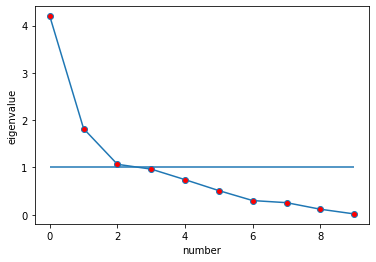

In [220]:
import matplotlib.pyplot as plt
plt.plot(df_eig_var["eigenvalues"], marker='o', markerfacecolor="red")
plt.xlabel("number")
plt.ylabel("eigenvalue")
plt.hlines(y=1, xmin=0, xmax=9)

In [221]:
#метод главных компонент ДЛЯ ВСЕХ ФАКТОРОВ
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X=df.values
X=standardscaler.fit_transform(X)
X_pca=pca.fit_transform(X)
X_pca.shape

(87, 10)

In [222]:
#файл с коэффициентами и значениями МГК для всех факторов
#from google.colab import files
#pd.DataFrame(X_pca,index=df.index,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"]).to_excel("Главные компоненты на всех факторах.xlsx")
#files.download("Главные компоненты на всех факторах.xlsx")
#pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"]).to_excel("Коэффициенты МГК на всех факторах.xlsx")
#files.download("Коэффициенты МГК на всех факторах.xlsx")

In [223]:
pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
f1,0.40984,-0.13899,0.36747,0.22218,0.32895,0.40196,0.26955,0.37026,-0.12459,0.36504
f2,-0.19789,0.18897,0.42616,0.35334,0.50258,-0.31699,0.25979,-0.33912,0.13022,-0.25720
f3,0.08193,0.75331,-0.01325,-0.31331,-0.09064,0.00536,0.37848,-0.07476,-0.38893,0.13828
f4,-0.01869,0.25217,-0.12540,-0.04602,-0.05356,0.14143,0.20888,-0.02105,0.86331,0.32553
f5,-0.06147,0.43993,-0.12712,0.70362,-0.11708,0.02588,-0.46044,0.10807,-0.08870,0.21334
f6,-0.43697,-0.19986,-0.33401,0.33827,-0.19431,-0.10011,0.62680,0.29017,-0.13230,0.02785
f7,0.41641,-0.24476,-0.08548,0.24936,-0.30300,-0.14586,0.18966,-0.66561,-0.09277,0.31065
f8,0.35677,0.12676,-0.15673,0.22910,-0.16808,0.43933,0.17205,-0.03823,0.10605,-0.71835
f9,0.50571,0.06670,0.00571,0.02707,-0.11633,-0.70033,0.04554,0.44334,0.14696,-0.12177
f10,0.18618,0.00017,-0.71262,-0.02435,0.66563,-0.04971,-0.02130,-0.07025,-0.06424,0.04321


In [224]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum()

,0
0,0.41967
1,0.60175
2,0.70846
3,0.80502
4,0.87932
5,0.93048
6,0.96059
7,0.98628
8,0.99810
9,1.00000


In [225]:
df_pca=pd.DataFrame(X_pca,index=df.index,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9","f10"])
df_pca

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
country,,,,,,,,,,
Algeria,-1.60561,0.04027,-0.01188,1.18863,0.41481,-0.19125,-0.51835,-0.62006,0.67255,-0.30441
Argentina,-1.21126,-0.54723,3.10952,1.90919,2.30034,-0.62819,-0.69672,-0.27858,0.31703,-0.10496
Australia,1.11754,-1.96586,0.40280,0.23404,0.03345,0.56446,0.22437,0.35458,-0.14591,0.08133
Austria,0.98937,-0.95323,0.22199,-0.49502,0.00567,-0.67928,-0.49468,0.87877,0.12595,0.07980
Bahrain,1.84847,-0.21676,0.57012,-0.87661,-0.15049,-0.55820,0.32098,-0.65016,-0.25799,-0.05477
Bangladesh,-2.84744,0.41523,0.80836,-1.00418,0.23879,0.37725,-0.37745,0.22049,0.56767,0.02118
Barbados,-0.36778,0.07697,-0.79662,-0.13913,-0.29774,0.35016,-1.10964,1.20899,-0.24977,-0.18109
Belgium,2.36252,-0.20988,0.00233,0.35717,0.40360,-0.53282,-0.06503,-0.51370,-0.22128,0.12936
Botswana,-1.87609,1.11375,-1.24814,1.30897,-0.65750,-0.73428,0.94737,-0.53867,-0.06689,-0.08401


In [226]:
#вычислим Махаланобиса
import pandas as pd
import scipy as sp
import numpy as np
from scipy.stats import chi2
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()
df_pca['mahala'] = mahalanobis(x=df_pca, data=df_pca)
df_pca['p_value'] = 1 - chi2.cdf(df_pca['mahala'], 2)
countries=df_pca.loc[df_pca.p_value < 0.01].index
df_pca.loc[df_pca.p_value < 0.01]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,mahala,p_value
country,,,,,,,,,,,,
Algeria,-1.60561,0.04027,-0.01188,1.18863,0.41481,-0.19125,-0.51835,-0.62006,0.67255,-0.30441,13.31665,0.00128
Argentina,-1.21126,-0.54723,3.10952,1.90919,2.30034,-0.62819,-0.69672,-0.27858,0.31703,-0.10496,24.30410,0.00001
Barbados,-0.36778,0.07697,-0.79662,-0.13913,-0.29774,0.35016,-1.10964,1.20899,-0.24977,-0.18109,12.89098,0.00159
Botswana,-1.87609,1.11375,-1.24814,1.30897,-0.65750,-0.73428,0.94737,-0.53867,-0.06689,-0.08401,10.78377,0.00455
Cyprus,2.19903,1.70201,-2.53885,-0.54769,3.56424,1.66237,1.03500,1.15326,0.30764,-0.05123,40.79303,0.00000
"Egypt, Arab Rep.",-2.36252,0.74191,1.94872,0.92213,1.05809,-0.18896,-0.82812,0.66148,0.47930,-0.02391,13.44645,0.00120
Eswatini,-3.38450,2.74989,-1.21643,2.11606,-0.91041,-1.63798,0.61119,0.77691,-0.32003,-0.01533,23.46309,0.00001
Ghana,-2.53902,1.52253,1.80387,-0.07885,1.06418,-0.66743,-0.00419,-0.19646,-0.20763,0.28165,12.79784,0.00166
"Hong Kong SAR, China",7.17093,5.35238,3.55791,1.30374,-2.58940,3.22372,0.05146,0.15273,0.04778,0.02923,70.29444,0.00000


In [227]:
df_pca.loc[df_pca.p_value < 0.000005].sort_values(by=["mahala"],ascending=False)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,mahala,p_value
country,,,,,,,,,,,,
"Hong Kong SAR, China",7.17093,5.35238,3.55791,1.30374,-2.58940,3.22372,0.05146,0.15273,0.04778,0.02923,70.29444,0.00000
Malta,4.48162,3.85232,-2.40951,-0.73305,4.23579,0.86773,0.47370,-0.19595,-0.21721,-0.08202,45.66874,0.00000
Cyprus,2.19903,1.70201,-2.53885,-0.54769,3.56424,1.66237,1.03500,1.15326,0.30764,-0.05123,40.79303,0.00000
Luxembourg,5.84632,2.05806,0.09372,-0.65163,-0.44831,-2.56004,0.15549,0.23278,0.64269,0.10884,28.08313,0.00000
Qatar,2.60913,-1.90610,0.32202,-0.91185,-0.55907,-0.71657,1.78510,-0.05267,1.12435,0.02446,27.00762,0.00000
South Africa,-1.97443,1.49646,-0.19102,3.67520,-1.25523,0.40019,1.12970,0.45328,-0.03939,-0.23287,26.21329,0.00000


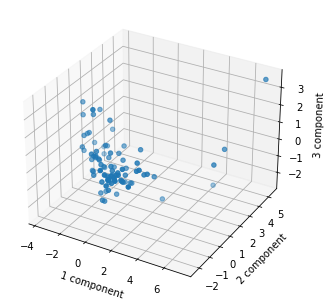

In [228]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(df_pca["f1"],df_pca["f2"],df_pca["f3"])
ax.set_xlabel("1 component")
ax.set_ylabel("2 component")
ax.set_zlabel("3 component")

pyplot.show()

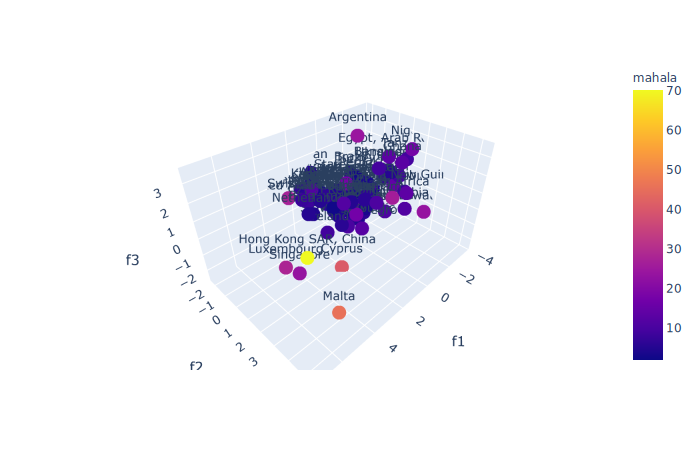

In [229]:
import plotly.express as px
fig = px.scatter_3d(df_pca, x='f1', y='f2', z='f3',color='mahala',text=df_pca.index,size_max=10)
fig.show()

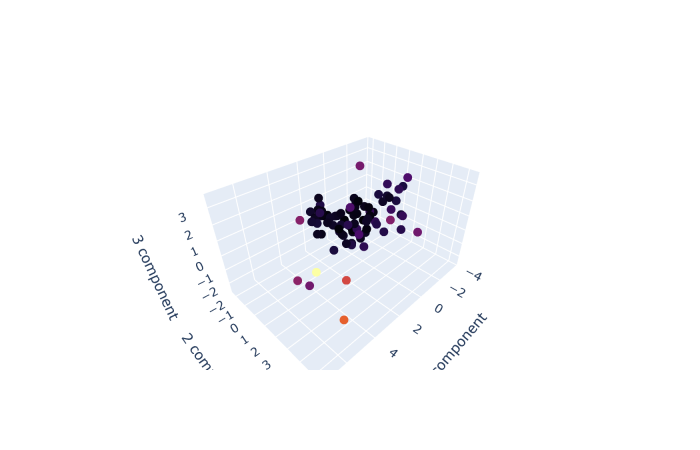

In [230]:
outlying_observations=df_pca.loc[df_pca.p_value < 0.000005]
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df_pca['f1'], y=df_pca['f2'], z=df_pca['f3'], mode='markers',text=df_pca.index,marker=dict(size=5,color=df_pca['mahala'],colorscale="Inferno")))
fig.update_layout(scene = dict(
                    xaxis_title='1 component',
                    yaxis_title='2 component',
                    zaxis_title='3 component')
                    )
fig.show()

**Сначала построим все 9 компонент, хотя видно, что первые 3 компоненты объясняют более 91% первоначальной изменчивости**



In [231]:
X=df.drop(columns=["Exp"])
import numpy as np
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
previous_columns=X.columns
previous_rows=X.index
X=standardscaler.fit_transform(X.values)
X=pd.DataFrame(X,columns=previous_columns,index=previous_rows)
pca=PCA(n_components=9)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9"],index=X.index)
weights=pd.DataFrame(pca.components_,columns=["x1","x2","x3","x4","x5","x6","x7","x8","x9"],index=["f1","f2","f3","f4","f5","f6","f7","f8","f9"])
weights

,x1,x2,x3,x4,x5,x6,x7,x8,x9
f1,0.44651,-0.16336,0.19864,0.27157,0.46111,0.25756,0.43289,-0.13817,0.41868
f2,-0.12924,0.21748,0.51140,0.59277,-0.21022,0.41617,-0.23769,0.18522,-0.12204
f3,0.08464,0.74360,-0.32754,-0.10043,0.00470,0.36446,-0.07288,-0.40874,0.13150
f4,0.01001,0.22371,-0.22270,-0.14059,0.15879,0.13940,-0.02467,0.85578,0.32076
f5,-0.02158,0.47737,0.58475,-0.17538,0.05347,-0.57252,0.08709,-0.00767,0.24633
f6,0.59954,0.11139,-0.23841,0.41140,0.11857,-0.42284,-0.42307,0.06459,-0.16141
f7,0.28075,-0.26962,0.23030,-0.37036,-0.22352,0.19249,-0.60328,-0.10688,0.44260
f8,0.28417,0.07476,0.29943,-0.44262,0.39908,0.25019,-0.06059,0.10059,-0.62645
f9,0.50712,0.06674,0.02596,-0.10928,-0.70129,0.04448,0.44272,0.14630,-0.12070


<AxesSubplot:>

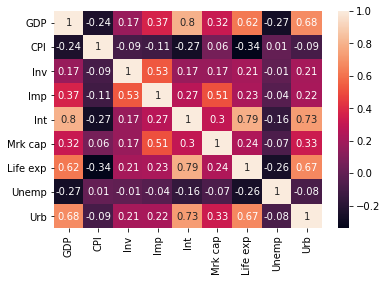

In [232]:
df_dop=df.drop(columns=["Exp"])
sns.heatmap(df_dop.corr().round(2),annot=True)

In [233]:
#таблица собственных значений (eigenvalue)
R_dop=df_dop.corr()
df_eig_var_dop=pd.DataFrame(pd.DataFrame(np.linalg.eigvals(R_dop),columns=["eigenvalues"]).sort_values(by=["eigenvalues"], ascending=False).values,columns=["eigenvalues"])
df_eig_var_dop

,eigenvalues
0,3.72675
1,1.45941
2,1.06686
3,0.94269
4,0.72737
5,0.42086
6,0.29686
7,0.24103
8,0.11817


In [234]:
#percent of variance (доля объясненной дисперсии) и cumulative percentage (процент накопленной дисперсии)
summa=sum(np.linalg.eigvals(R_dop))
df_eig_var_dop["percent of variance"]=df_eig_var_dop["eigenvalues"].apply(lambda x: x/summa*100)
df_eig_var_dop["cumulative percentage"]=df_eig_var_dop["percent of variance"].cumsum()
df_eig_var_dop

,eigenvalues,percent of variance,cumulative percentage
0,3.72675,41.40838,41.40838
1,1.45941,16.21568,57.62406
2,1.06686,11.85403,69.47809
3,0.94269,10.47432,79.95241
4,0.72737,8.08189,88.03430
5,0.42086,4.67623,92.71053
6,0.29686,3.29839,96.00893
7,0.24103,2.67807,98.68700
8,0.11817,1.31300,100.00000


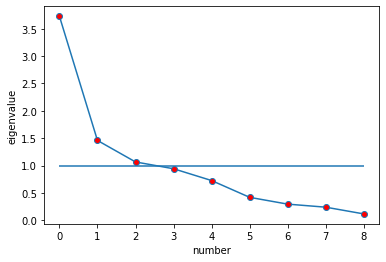

In [235]:
import matplotlib.pyplot as plt
plt.plot(df_eig_var_dop["eigenvalues"], marker='o', markerfacecolor="red")
plt.xlabel("number")
plt.ylabel("eigenvalue")
plt.hlines(y=1, xmin=0, xmax=8)

In [236]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
y=df["Exp"].values.reshape(-1,1)
y_scaled=standardscaler.fit_transform(y)
import statsmodels.api as sm
X = X_pca
X_sm=sm.add_constant(X)
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     224.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           1.88e-51
Time:                        22:24:21   Log-Likelihood:                 20.267
No. Observations:                  87   AIC:                            -20.53
Df Residuals:                      77   BIC:                             4.125
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       4.163e-17      0.022   1.91e-15      1.0

In [237]:
X_sm=X_sm.drop(columns=["f3","f9"])
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     292.5
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.79e-54
Time:                        22:24:21   Log-Likelihood:                 19.788
No. Observations:                  87   AIC:                            -23.58
Df Residuals:                      79   BIC:                            -3.848
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       4.163e-17      0.022   1.92e-15      1.0

In [238]:
outlying_observations

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,mahala,p_value
country,,,,,,,,,,,,
Cyprus,2.19903,1.70201,-2.53885,-0.54769,3.56424,1.66237,1.03500,1.15326,0.30764,-0.05123,40.79303,0.00000
"Hong Kong SAR, China",7.17093,5.35238,3.55791,1.30374,-2.58940,3.22372,0.05146,0.15273,0.04778,0.02923,70.29444,0.00000
Luxembourg,5.84632,2.05806,0.09372,-0.65163,-0.44831,-2.56004,0.15549,0.23278,0.64269,0.10884,28.08313,0.00000
Malta,4.48162,3.85232,-2.40951,-0.73305,4.23579,0.86773,0.47370,-0.19595,-0.21721,-0.08202,45.66874,0.00000
Qatar,2.60913,-1.90610,0.32202,-0.91185,-0.55907,-0.71657,1.78510,-0.05267,1.12435,0.02446,27.00762,0.00000
South Africa,-1.97443,1.49646,-0.19102,3.67520,-1.25523,0.40019,1.12970,0.45328,-0.03939,-0.23287,26.21329,0.00000


In [239]:
#пересчет МГК без выбросов
dropped_indexes=["Hong Kong SAR, China","South Africa"]
X=df.drop(columns=["Exp"])
X=df.drop(index=dropped_indexes)
remained_indexes=X.index
pca=PCA(n_components=9)
X=standardscaler.fit_transform(X)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["f1","f2","f3","f4","f5","f6","f7","f8","f9"],index=remained_indexes)
X=X_pca
y=df["Exp"].drop(index=dropped_indexes).values.reshape(-1,1)
y_scaled=standardscaler.fit_transform(y)
X_sm=sm.add_constant(X)
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     723.0
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           4.38e-69
Time:                        22:24:21   Log-Likelihood:                 69.560
No. Observations:                  85   AIC:                            -119.1
Df Residuals:                      75   BIC:                            -94.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       1.249e-16      0.012   1.01e-14      1.0

In [240]:
#выбрасываем f7, f9 и f4
X_sm=X_sm.drop(columns=["f7","f9","f4"])
y_sm=y_scaled
model=sm.OLS(y_sm,X_sm)
results = model.fit()
print(results.summary(alpha=0.1))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1072.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.10e-73
Time:                        22:24:22   Log-Likelihood:                 67.443
No. Observations:                  85   AIC:                            -120.9
Df Residuals:                      78   BIC:                            -103.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const       1.249e-16      0.012   1.01e-14      1.0

In [241]:
kendall_coef_list=[]
p_value_kendall_list=[]
from scipy import stats
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      kendall_coef_list.append(np.nan)
      p_value_kendall_list.append(np.nan)
    if i!=j:
      x=df.iloc[:,i]
      y=df.iloc[:,j]
      tau, p_value = stats.kendalltau(x,y)
      kendall_coef_list.append(tau)
      p_value_kendall_list.append(p_value)

In [242]:
coef_kendall=pd.DataFrame(np.array(kendall_coef_list).reshape([10,10]),index=df.columns,columns=df.columns)
p_value_kendall=pd.DataFrame(np.array(p_value_kendall_list).reshape([10,10]),index=df.columns,columns=df.columns)

In [243]:
#коэффициенты Кендалла
coef_kendall

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,-0.13713,0.31997,0.12911,0.15531,0.73483,0.36541,0.60438,-0.11468,0.56677
CPI,-0.13713,nan,-0.15531,-0.03395,-0.15958,-0.11361,-0.01149,-0.12323,-0.03502,-0.02460
Exp,0.31997,-0.15531,nan,0.34403,0.72841,0.27720,0.12376,0.16921,-0.05694,0.15934
Inv,0.12911,-0.03395,0.34403,nan,0.44988,0.18257,0.05801,0.15370,0.14248,0.13795
Imp,0.15531,-0.15958,0.72841,0.44988,nan,0.17134,0.04571,0.10933,0.04036,0.03689
Int,0.73483,-0.11361,0.27720,0.18257,0.17134,nan,0.35044,0.64608,-0.05266,0.51972
Mrk cap,0.36541,-0.01149,0.12376,0.05801,0.04571,0.35044,nan,0.31836,-0.14408,0.34648
Life exp,0.60438,-0.12323,0.16921,0.15370,0.10933,0.64608,0.31836,nan,-0.04518,0.46678
Unemp,-0.11468,-0.03502,-0.05694,0.14248,0.04036,-0.05266,-0.14408,-0.04518,nan,-0.05347
Urb,0.56677,-0.02460,0.15934,0.13795,0.03689,0.51972,0.34648,0.46678,-0.05347,nan


In [244]:
#тау-статистика Кендалла
tau_kendall=coef_kendall.apply(lambda x: abs(x)*np.sqrt(9*87*(87-1)/(2*(2*87+5))))
tau_kendall

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,1.88069,4.38829,1.77071,2.12999,10.07803,5.01152,8.28899,1.57274,7.77311
CPI,1.88069,nan,2.12999,0.46559,2.18864,1.55808,0.15764,1.69006,0.48026,0.33732
Exp,4.38829,2.12999,nan,4.71823,9.99004,3.80172,1.69739,2.32062,0.78087,2.18527
Inv,1.77071,0.46559,4.71823,nan,6.17000,2.50393,0.79554,2.10799,1.95402,1.89195
Imp,2.12999,2.18864,9.99004,6.17000,nan,2.34995,0.62690,1.49942,0.55358,0.50599
Int,10.07803,1.55808,3.80172,2.50393,2.34995,nan,4.80622,8.86089,0.72222,7.12779
Mrk cap,5.01152,0.15764,1.69739,0.79554,0.62690,4.80622,nan,4.36629,1.97601,4.75186
Life exp,8.28899,1.69006,2.32062,2.10799,1.49942,8.86089,4.36629,nan,0.61957,6.40182
Unemp,1.57274,0.48026,0.78087,1.95402,0.55358,0.72222,1.97601,0.61957,nan,0.73331
Urb,7.77311,0.33732,2.18527,1.89195,0.50599,7.12779,4.75186,6.40182,0.73331,nan


In [245]:
#значимые коэффициенты
tau_kendall[tau_kendall>1.96].fillna("")

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,,4.38829,,2.12999,10.07803,5.01152,8.28899,,7.77311
CPI,,,2.12999,,2.18864,,,,,
Exp,4.38829,2.12999,,4.71823,9.99004,3.80172,,2.32062,,2.18527
Inv,,,4.71823,,6.17000,2.50393,,2.10799,,
Imp,2.12999,2.18864,9.99004,6.17000,,2.34995,,,,
Int,10.07803,,3.80172,2.50393,2.34995,,4.80622,8.86089,,7.12779
Mrk cap,5.01152,,,,,4.80622,,4.36629,1.97601,4.75186
Life exp,8.28899,,2.32062,2.10799,,8.86089,4.36629,,,6.40182
Unemp,,,,,,,1.97601,,,
Urb,7.77311,,2.18527,,,7.12779,4.75186,6.40182,,


In [246]:
spearman_coef_list=[]
p_value_spearman_list=[]
from scipy import stats
for i in range(0,10):
  for j in range(0,10):
    if i==j:
      spearman_coef_list.append(np.nan)
      p_value_spearman_list.append(np.nan)
    if i!=j:
      x=df.iloc[:,i]
      y=df.iloc[:,j]
      sp, p_value = stats.spearmanr(x,y)
      spearman_coef_list.append(sp)
      p_value_spearman_list.append(p_value)

In [247]:
coef_spearman=pd.DataFrame(np.array(spearman_coef_list).reshape([10,10]),index=df.columns,columns=df.columns)
p_value_spearman=pd.DataFrame(np.array(p_value_spearman_list).reshape([10,10]),index=df.columns,columns=df.columns)

In [248]:
#коэффициенты Спирмена
coef_spearman

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,-0.24196,0.44793,0.18577,0.23157,0.90989,0.51043,0.80675,-0.12069,0.75491
CPI,-0.24196,nan,-0.23815,-0.04904,-0.24331,-0.21965,-0.03683,-0.21300,-0.05182,-0.04837
Exp,0.44793,-0.23815,nan,0.49293,0.88671,0.37568,0.18096,0.24249,-0.09104,0.22355
Inv,0.18577,-0.04904,0.49293,nan,0.62889,0.25365,0.08406,0.21694,0.21896,0.20386
Imp,0.23157,-0.24331,0.88671,0.62889,nan,0.23859,0.07345,0.16048,0.05940,0.05359
Int,0.90989,-0.21965,0.37568,0.25365,0.23859,nan,0.51638,0.85301,-0.04403,0.71083
Mrk cap,0.51043,-0.03683,0.18096,0.08406,0.07345,0.51638,nan,0.44689,-0.20382,0.50909
Life exp,0.80675,-0.21300,0.24249,0.21694,0.16048,0.85301,0.44689,nan,-0.06200,0.66408
Unemp,-0.12069,-0.05182,-0.09104,0.21896,0.05940,-0.04403,-0.20382,-0.06200,nan,-0.06290
Urb,0.75491,-0.04837,0.22355,0.20386,0.05359,0.71083,0.50909,0.66408,-0.06290,nan


In [249]:
#тау-статистика Спирмена
tau_spearman=coef_spearman.apply(lambda x: abs(x)/np.sqrt(1-x**2)*np.sqrt(87-2))
tau_spearman

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,nan,2.29910,4.61900,1.74309,2.19466,20.22160,5.47246,12.58770,1.12090,10.61229
CPI,2.29910,nan,2.26071,0.45272,2.31272,2.07581,0.33982,2.00991,0.47836,0.44648
Exp,4.61900,2.26071,nan,5.22323,17.68245,3.73740,1.69639,2.30444,0.84282,2.11451
Inv,1.74309,0.45272,5.22323,nan,7.45741,2.41755,0.77771,2.04887,2.06893,1.91984
Imp,2.19466,2.31272,17.68245,7.45741,nan,2.26511,0.67900,1.49894,0.54858,0.49481
Int,20.22160,2.07581,3.73740,2.41755,2.26511,nan,5.55940,15.06893,0.40636,9.31734
Mrk cap,5.47246,0.33982,1.69639,0.77771,0.67900,5.55940,nan,4.60561,1.91938,5.45309
Life exp,12.58770,2.00991,2.30444,2.04887,1.49894,15.06893,4.60561,nan,0.57274,8.18886
Unemp,1.12090,0.47836,0.84282,2.06893,0.54858,0.40636,1.91938,0.57274,nan,0.58103
Urb,10.61229,0.44648,2.11451,1.91984,0.49481,9.31734,5.45309,8.18886,0.58103,nan


In [250]:
#значимые коэффициенты
tau_spearman[tau_spearman>2.23].fillna("")

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,2.29910,4.61900,,,20.22160,5.47246,12.58770,,10.61229
CPI,2.29910,,2.26071,,2.31272,,,,,
Exp,4.61900,2.26071,,5.22323,17.68245,3.73740,,2.30444,,
Inv,,,5.22323,,7.45741,2.41755,,,,
Imp,,2.31272,17.68245,7.45741,,2.26511,,,,
Int,20.22160,,3.73740,2.41755,2.26511,,5.55940,15.06893,,9.31734
Mrk cap,5.47246,,,,,5.55940,,4.60561,,5.45309
Life exp,12.58770,,2.30444,,,15.06893,4.60561,,,8.18886
Unemp,,,,,,,,,,
Urb,10.61229,,,,,9.31734,5.45309,8.18886,,


In [251]:
combo=tau_spearman[tau_spearman<=2.23].fillna(0)*tau_kendall[tau_kendall<=1.96].fillna(0)
combo=combo.replace(0,"")
combo

,GDP,CPI,Exp,Inv,Imp,Int,Mrk cap,Life exp,Unemp,Urb
GDP,,,,3.08650,,,,,1.76288,
CPI,,,,0.21078,,3.23428,0.05357,3.39686,0.22973,0.15061
Exp,,,,,,,2.87944,,0.65813,
Inv,3.08650,0.21078,,,,,0.61870,,4.04273,3.63223
Imp,,,,,,,0.42566,2.24755,0.30368,0.25037
Int,,3.23428,,,,,,,0.29348,
Mrk cap,,0.05357,2.87944,0.61870,0.42566,,,,,
Life exp,,3.39686,,,2.24755,,,,0.35485,
Unemp,1.76288,0.22973,0.65813,4.04273,0.30368,0.29348,,0.35485,,0.42608
Urb,,0.15061,,3.63223,0.25037,,,,0.42608,


In [252]:
combo.iloc[[1,3,8,9],[1,3,8,9]]

,CPI,Inv,Unemp,Urb
CPI,,0.21078,0.22973,0.15061
Inv,0.21078,,4.04273,3.63223
Unemp,0.22973,4.04273,,0.42608
Urb,0.15061,3.63223,0.42608,


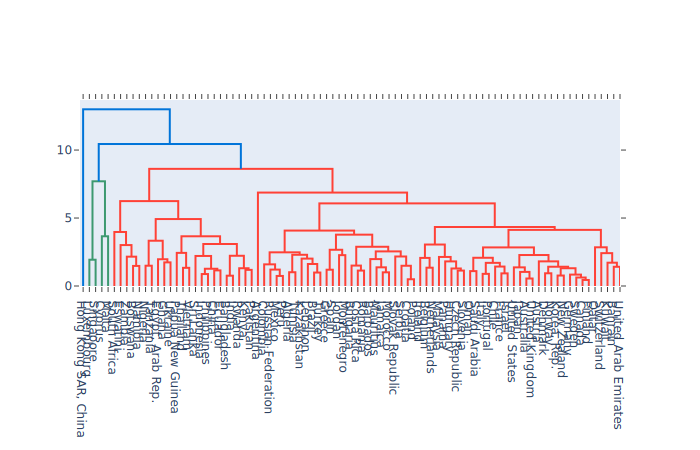

In [253]:
#группировка в полном признаковом пространстве
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_for_poln=df
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_poln.values),columns=df_for_poln.columns,index=df_for_poln.index)
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [254]:
df_for_poln=df.drop(index=["Hong Kong SAR, China"])
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_poln.values),columns=df_for_poln.columns,index=df_for_poln.index)
X = df_scaled.values

In [255]:
from scipy.cluster.hierarchy import fclusterdata
pd.set_option('display.max_rows',100)
ip4_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_scaled.index,columns=["полное признаковое пространство"])

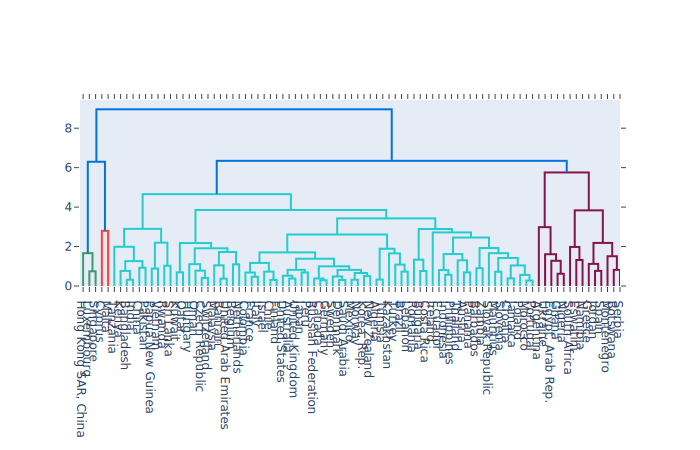

In [256]:
#группировка в сокращенном признаковом пространстве по Кендаллу и Спирмену методом дальнего соседа
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_for_sokr=df[["CPI","Exp","Inv","Unemp","Urb"]]
df_scaled=pd.DataFrame(standardscaler.fit_transform(df_for_sokr.values),columns=df_for_sokr.columns,index=df_for_sokr.index)
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [257]:
ip4_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_scaled.index,columns=["сокращенное признаковое пространство"])
countries_cl=pd.concat([ip4_poln,ip4_sokr],axis=1)
countries_cl.to_excel("группировка ИП4.xlsx")

**<h1>Кластерный анализ</h1>**

In [258]:
#стандартизируем данные
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
df_scaled=pd.DataFrame(standardscaler.fit_transform(df.values),columns=df.columns,index=df.index)

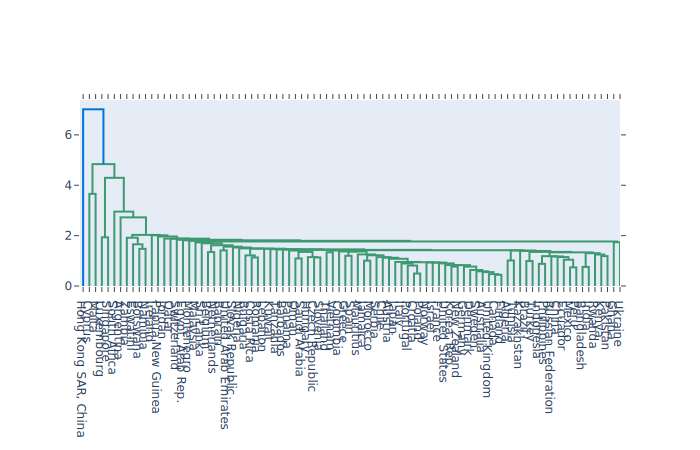

In [259]:
#метод ближайшего соседа на первоначальных данных
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
X = df_scaled.values
names = df_scaled.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

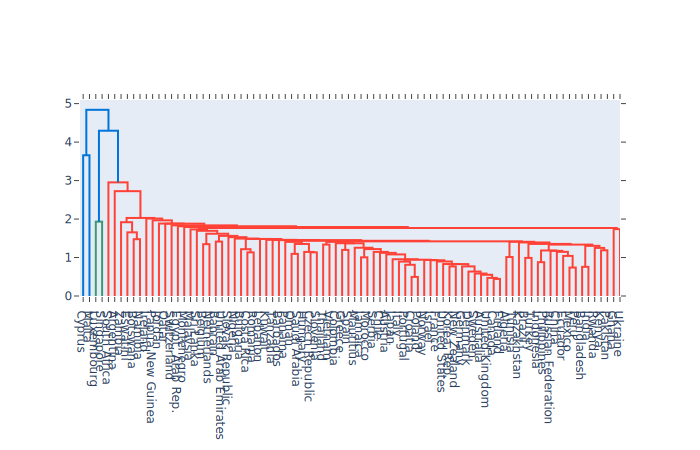

In [260]:
#убираем 1 выброс - Гонконг
df_dropped=df_scaled.drop(index=["Hong Kong SAR, China"])
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

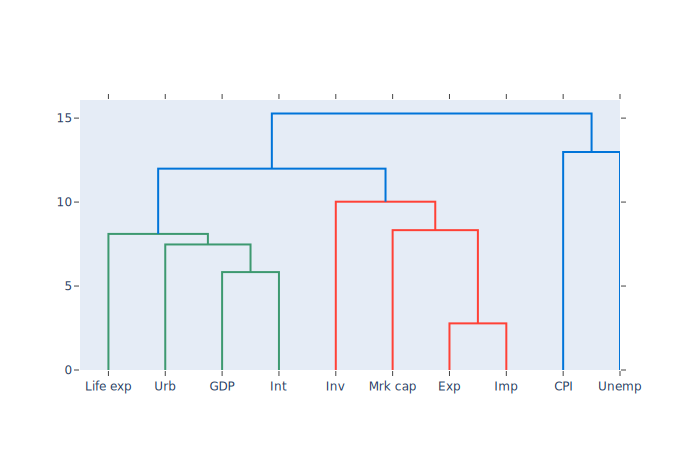

In [261]:
#метод дальнего соседа
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

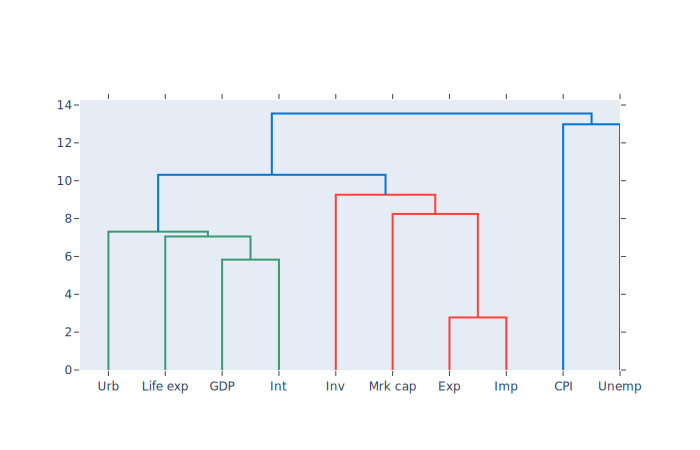

In [262]:
#group average method
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "average"))
fig.update_layout(width=1300, height=1000)
fig.show()

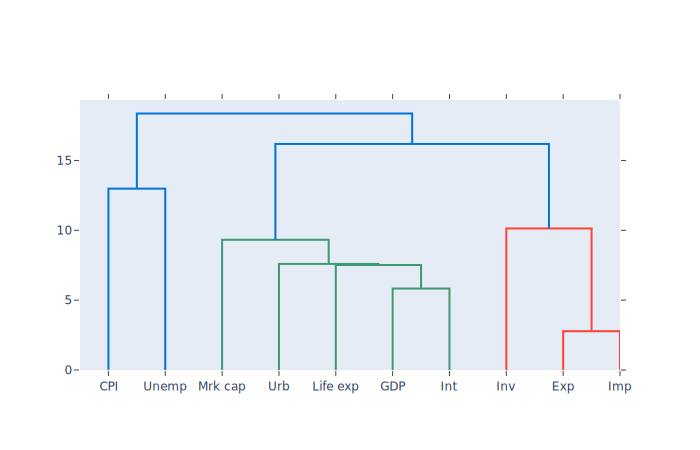

In [263]:
#метод Варда
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

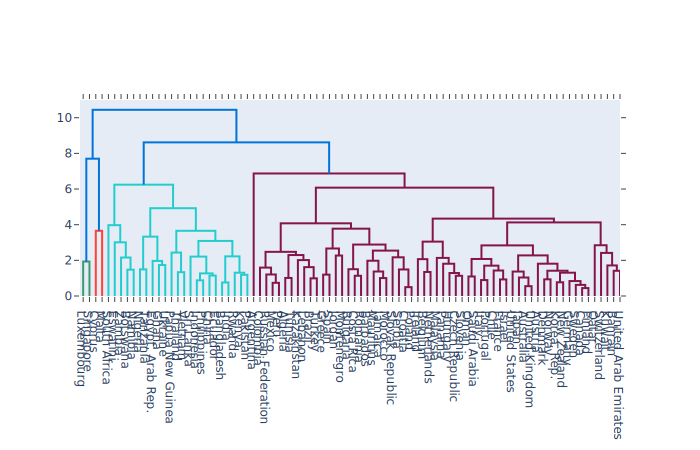

In [264]:
#Метод дальнего соседа в ПОЛНОМ признаковом пространстве (без выбросов)
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [266]:
from scipy.cluster.hierarchy import fclusterdata
pd.set_option('display.max_rows',100)
countries_clusters_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_sokr.index,columns=["полное признаковое пространство"])

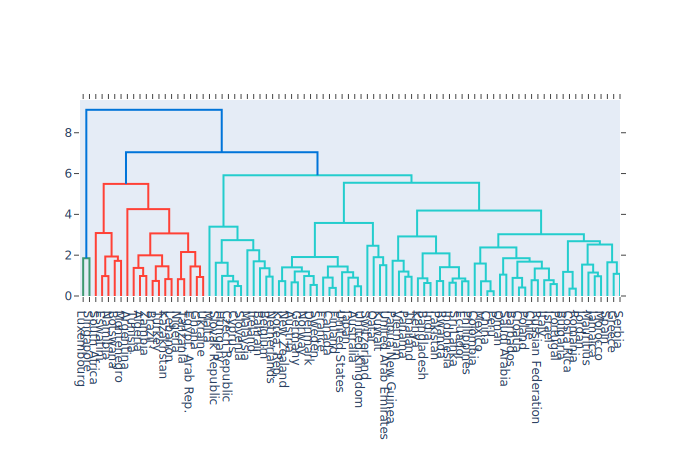

In [265]:
#Метод дальнего соседа в СОКРАЩЕННОМ признаковом пространстве (без выбросов)
df_sokr=df_dropped.drop(columns=["Life exp","Urb","Inv"])
X = df_sokr.values
names = df_sokr.index
fig = ff.create_dendrogram(X, labels=names,linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [267]:
countries_clusters_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_sokr.index,columns=["сокращенное признаковое пространство"])
countries_clusters=pd.concat([countries_clusters_poln,countries_clusters_sokr],axis=1)

In [268]:
#countries_clusters.to_excel("кластеры по странам.xlsx")
#files.download("кластеры по странам.xlsx")

In [269]:
import pandas as pd
df=pd.read_excel("ИП1 опрос данные измененные.xlsx",index_col=0)

In [270]:
df

,Женский,Мужской,18 - 20,21-23,24-30,31-40,41 и старше,Высшее (бакалавриат или специалитет),Высшее (магистратура и выше),Основное общее,...,Среднее профессиональное,Гуманитарные науки и социология,"Математика, информационные технологии, физика",Медицина и социальное обеспечение,"Строительство, архитектура, дизайн",Сфера образования и педагогики,Экономика,Да,Не знаю,Нет
Респондент 1,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Респондент 2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
Респондент 3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Респондент 4,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
Респондент 5,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
Респондент 6,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
Респондент 7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
Респондент 8,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Респондент 9,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
Респондент 10,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


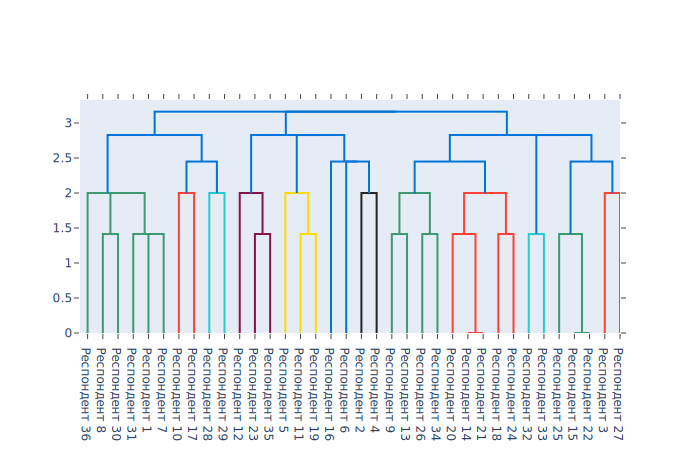

In [271]:
#ПОЛНОЕ признаковое пространство (метод дальнего соседа)
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
X = df.values
names = df.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [272]:
from scipy.cluster.hierarchy import fclusterdata
ip5_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df.index,columns=["Полное признаковое пространство"])

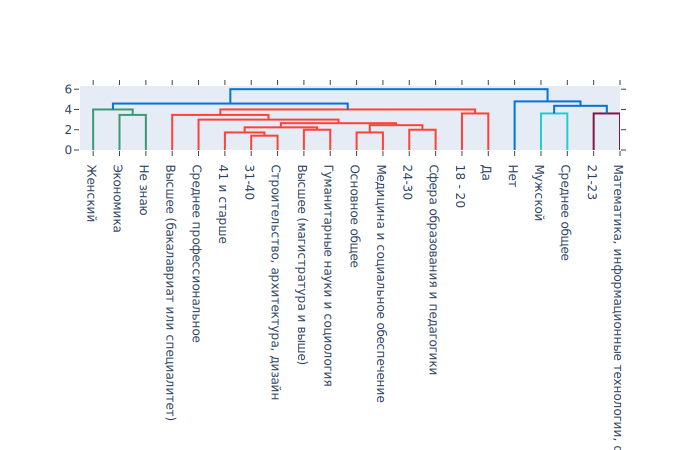

In [273]:
#дендрограмма признаков (метод дальнего соседа)
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

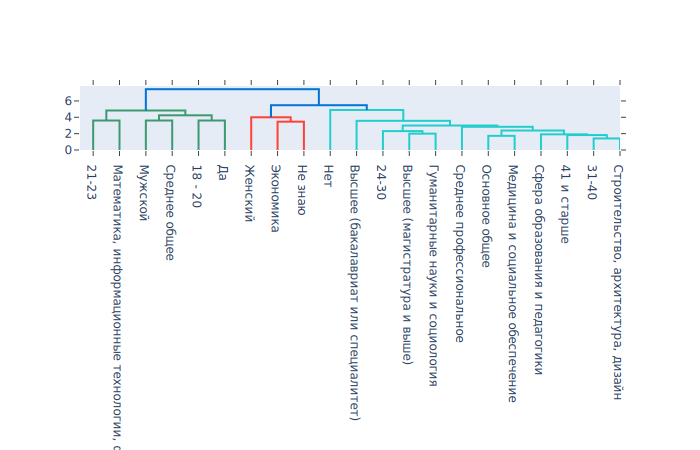

In [274]:
#дендрограмма признаков (метод Уорда)
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

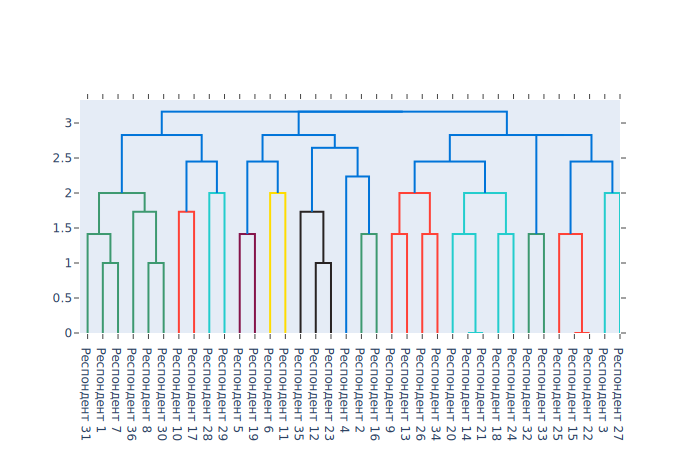

In [275]:
#СОКРАЩЕННОЕ признаковое пространство - убрали ... (метод дальнего соседа)
X = df.drop(columns=["Строительство, архитектура, дизайн", "Медицина и социальное обеспечение","Сфера образования и педагогики"]).values
names = df.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [276]:
ip5_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df.index,columns=["Сокращенное признаковое пространство"])
ip5_2_cl=pd.concat([ip5_poln,ip5_sokr],axis=1)
ip5_2_cl.to_excel("группировка ИП5 часть 2.xlsx")

In [277]:
import pandas as pd
df=pd.read_excel("подсчет дубликатов.xlsx",index_col=0)
df

,Э1,Э2,Э3,Э4,Э5,Э6,Э7,Э8,Э9,Э10,...,Э21,Э22,Э23,Э24,Э25,Э26,Э27,Э28,Э29,Э30
x1,3,1,8,5,5,4,5,1,1,1,...,5,5,4,5,1,1,1,7,6,8
x2,2,1,1,5,2,4,1,1,8,7,...,5,2,4,1,1,8,7,1,8,7
x3,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,2,9
x4,6,1,6,3,5,4,5,5,4,5,...,3,5,4,5,5,4,5,3,4,5
x5,3,1,1,3,2,1,1,8,1,1,...,3,2,1,1,8,1,1,1,8,2
x6,8,7,3,5,2,4,4,5,6,8,...,5,2,4,4,5,6,8,3,3,2
x7,1,6,6,1,1,1,1,1,6,5,...,1,1,1,1,1,6,5,3,6,2
x8,3,1,4,1,5,4,8,7,4,1,...,1,5,4,8,7,4,1,7,1,1
x9,6,8,4,5,8,1,5,1,3,1,...,5,8,1,5,1,3,1,3,4,5


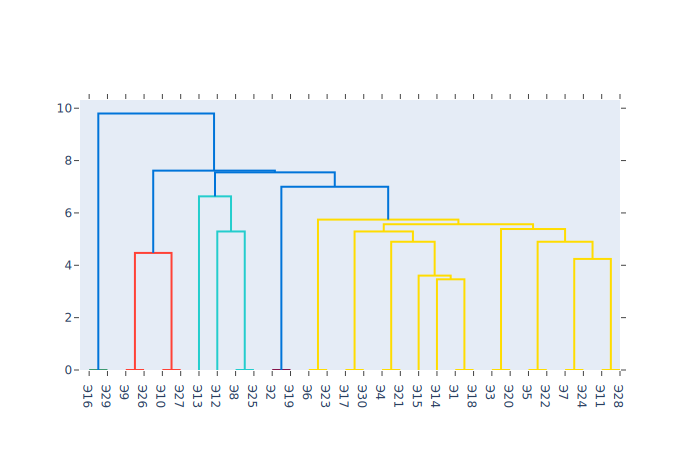

In [278]:
#дендрограмма всех экспертов (метод ближнего соседа)
import plotly.figure_factory as ff
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fclusterdata
X = df.values.T
names = df.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

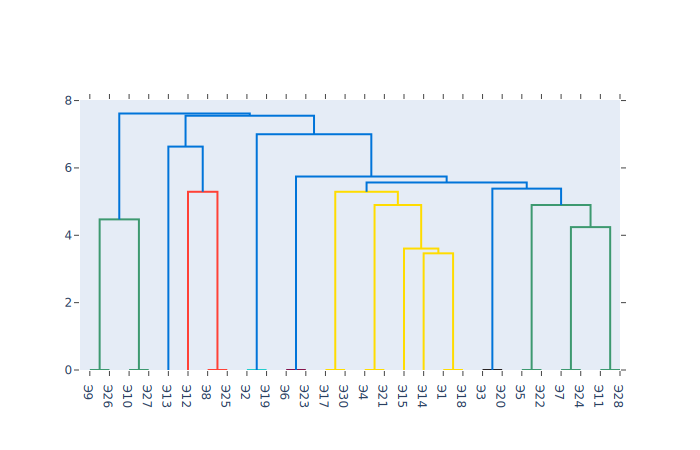

In [279]:
#убираем выбросы - Э16 и Э29
df_dropped=df.drop(columns=["Э16","Э29"])
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "single"))
fig.update_layout(width=1300, height=1000)
fig.show()

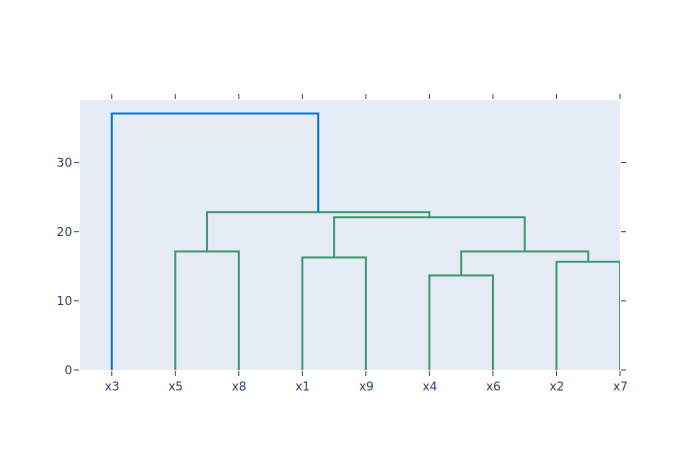

In [280]:
#оцениваем признаки (без выбросов) - метод дальнего соседа
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

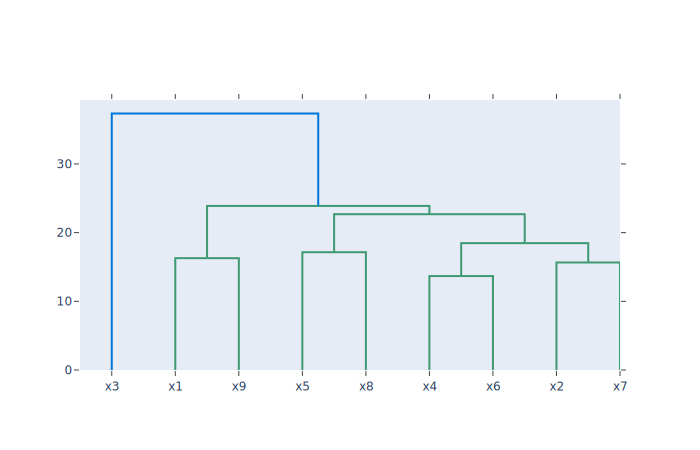

In [281]:
#метод Уорда
X = df_dropped.values
names = df_dropped.index
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "ward"))
fig.update_layout(width=1300, height=1000)
fig.show()

**Отбираем x3, x4, x8 (и x1?)**

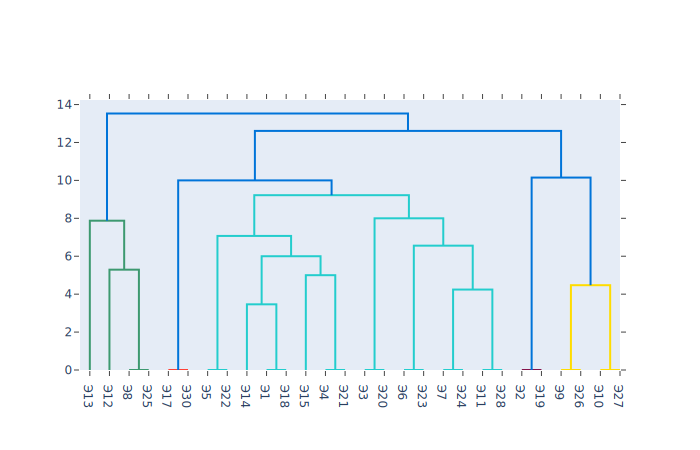

In [282]:
#Группировка в полном признаковом пространстве методом дальнего соседа (без выбросов)
X = df_dropped.values.T
names = df_dropped.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [283]:
ip5_3_poln=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_dropped.T.index,columns=["Полное признаковое пространство"])

x6 x7



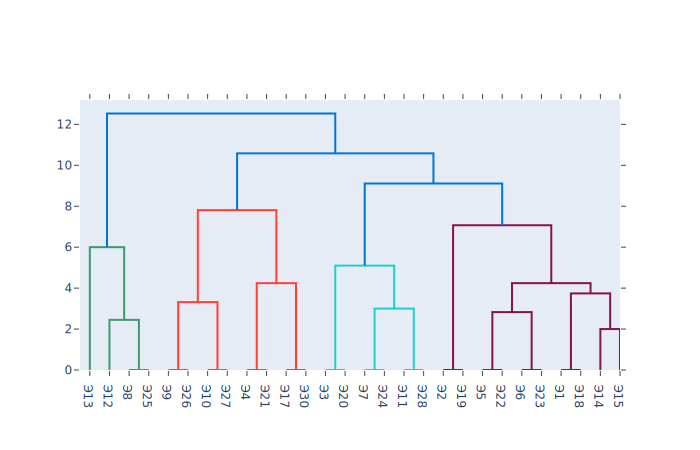

In [284]:
#Группировка в СОКРАЩЕННОМ признаковом пространстве методом дальнего соседа (без выбросов)
df_sokr=df_dropped.drop(index=["x6","x7","x9"])
X = df_sokr.values.T
names = df_sokr.columns
fig = ff.create_dendrogram(X, labels=names, linkagefun=lambda x: sch.linkage(x, "complete"))
fig.update_layout(width=1300, height=1000)
fig.show()

In [285]:
ip5_3_sokr=pd.DataFrame(fclusterdata(X,criterion='maxclust',method='complete',t=3),index=df_dropped.T.index,columns=["Сокращенное признаковое пространство"])
ip5_3_cl=pd.concat([ip5_3_poln,ip5_3_sokr],axis=1)
ip5_3_cl["Сокращенное признаковое пространство"]=ip5_3_cl["Сокращенное признаковое пространство"].apply(lambda x: 2 if x==3 else 3)
ip5_3_cl["разница"]=ip5_3_cl["Полное признаковое пространство"]-ip5_3_cl["Сокращенное признаковое пространство"]
ip5_3_cl

,Полное признаковое пространство,Сокращенное признаковое пространство,разница
Э1,2,2,0
Э2,3,2,1
Э3,2,2,0
Э4,2,3,-1
Э5,2,2,0
Э6,2,2,0
Э7,2,2,0
Э8,1,3,-2
Э9,3,3,0
Э10,3,3,0


In [286]:
ip5_3_cl.to_excel("группировка ИП5 часть 3.xlsx")